In [60]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, OPTICS, SpectralBiclustering
from sklearn.metrics import silhouette_score, homogeneity_score, consensus_score

# https://pyclustering.github.io/docs/0.9.0/html/d2/d4f/classpyclustering_1_1cluster_1_1clique_1_1clique.html
from pyclustering.cluster.clique import clique, clique_visualizer

# https://pypi.org/project/sklearn-som/
from sklearn_som.som import SOM

Učitavanje podataka iz Iris skupa

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

Izdvajanje PC koordinata za potrebe vizualizacije

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)

## KMeans++

In [6]:
# Uporediti sa "random" inicijalizacijom 
# pri malom broju iteracija i inicijalizacija
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1)
_ = km.fit(X)

Vizualizacija klastera dobijenih korišćenjem KMeans algoritma sa KMeans++ inicijalizacijom

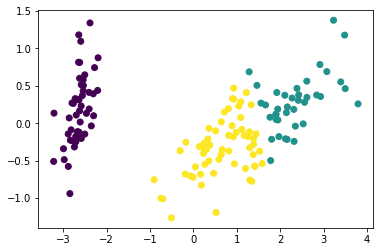

In [7]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_)

Provera kvaliteta klastera dobijenih KMeans algoritmom sa KMeans++ inicijalizacijom

In [10]:
# Silueta
silhouette_score(X, km.labels_, metric='euclidean')

0.551191604619592

In [11]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=km.labels_)

0.736419288125285

## OPTICS - Ordering points to identify the clustering structure

OPTICS algoritam, iako predstavlja poboljšanje u odnosu na DBSCAN algoritam, ne uspeva da razdvoji bliske klastere sličnih gustina

In [23]:
op = OPTICS(min_samples=10, max_eps=float('inf'), xi=0.15)
_ = op.fit(X)

Vizualizacija klastera dobijenih korišćenjem OPTICS algoritma

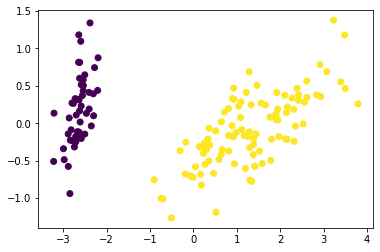

In [24]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=op.labels_)

Provera kvaliteta klastera dobijenih OPTICS algoritmom

In [26]:
# Silueta
silhouette_score(X, op.labels_, metric='euclidean')

0.6867350732769777

In [27]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=op.labels_)

0.5793801642856945

Grafik udaljenosti (reachability distance) tačaka u odgovarajućem uređenju

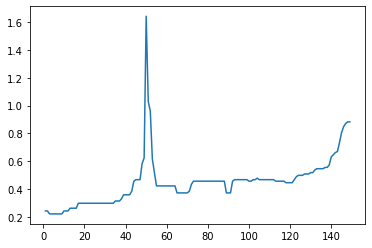

In [28]:
_ = plt.plot(op.reachability_[op.ordering_])

## CLIQUE

CLIQUE, takođe, ne uspeva da razdvoji susedne klastere sličnih gustima

In [45]:
threshold = 0
cl = clique(X, amount_intervals=5, density_threshold=3)
cl.process()

cl_clusters = cl.get_clusters()

In [46]:
print("Broj pronađenih klastera:", len(cl_clusters))

Broj pronađenih klastera: 2


Vizualizacija parova atributa i gustine tačaka u odnosu na vrednosti atributa

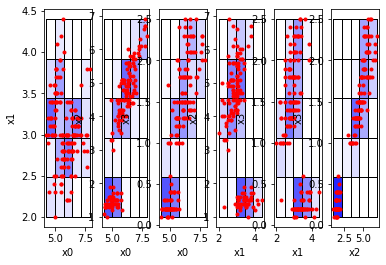

In [47]:
cells = cl.get_cells()
clique_visualizer.show_grid(cells, X)

Vizualizacija klastera dobijenih korišćenjem CLIQUE algoritma

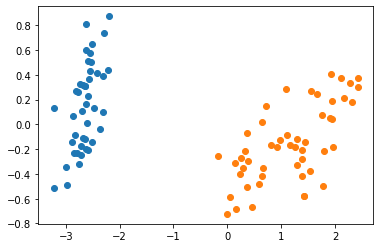

In [48]:
# Napomena: Nedostajuće tačke predstavljanju elemenate van granica
for i in range(len(cl_clusters)):
    cluster = cl_clusters[i]
    _ = plt.scatter(X_pca[cluster, 0], X_pca[cluster, 1])

## Spektralno Bi-Klasterovanje

Istovremeno klasterovanje entiteta i atributa pomoću reorganizacije matrice podataka pod pretpostavkom postojanja strukture "šahovske table" u matrici podataka.

In [50]:
sbc = SpectralBiclustering(n_clusters=3, n_components=2, n_best=2)
_ = sbc.fit(X)

Vizualizacija klastera (entiteta) dobijenih korišćenjem algoritma spaktralnog bi-klasterovanja

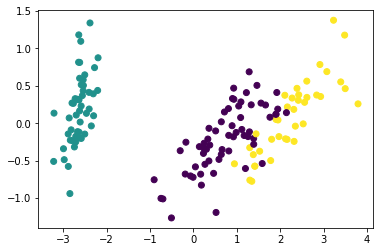

In [51]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sbc.row_labels_)

Provera kvaliteta klastera dobijenih algoritmom spektralnog bi-klasterovanja

In [52]:
# Silueta
silhouette_score(X, sbc.row_labels_, metric='euclidean')

0.4658629662525298

In [54]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=sbc.row_labels_)

0.7281425116063387

Oznake klastera atributa

In [58]:
sbc.column_labels_

array([1, 2, 0, 1], dtype=int32)

## SOM - Self Organizing Map

In [61]:
iris_som = SOM(m=3, n=1, dim=X.shape[1]) # []-[]-[]
_ = iris_som.fit(X)

In [62]:
som_clusters = iris_som.predict(X)

Vizualizacija klastera dobijenih korišćenjem SOM algoritma u odnosu na PC koordinate čvorova mape

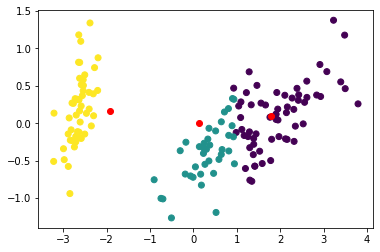

In [64]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=som_clusters)

C_pca = pca.transform(iris_som.weights)
plt.scatter(C_pca[:, 0], C_pca[:, 1], c='red')

Provera kvaliteta klastera dobijenih SOM algoritmom

In [66]:
# Silueta
silhouette_score(X, som_clusters, metric='euclidean')

0.5184081536207993

In [67]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=som_clusters)

0.778732331710659